In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
data = pd.read_csv("/content/Fertilizer Prediction.csv")
df = pd.DataFrame(data)
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
df.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [16]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

             Temparature  Humidity   Moisture  Nitrogen  Potassium  \
Temparature     1.000000   0.973164  0.091222 -0.033771  -0.023424   
Humidity        0.973164   1.000000  0.091342 -0.060646  -0.003833   
Moisture        0.091222   0.091342  1.000000 -0.095945   0.027727   
Nitrogen       -0.033771  -0.060646 -0.095945  1.000000  -0.500087   
Potassium      -0.023424  -0.003833  0.027727 -0.500087   1.000000   
Phosphorous     0.207545   0.204044  0.009276 -0.686971   0.089192   

             Phosphorous  
Temparature     0.207545  
Humidity        0.204044  
Moisture        0.009276  
Nitrogen       -0.686971  
Potassium       0.089192  
Phosphorous     1.000000  


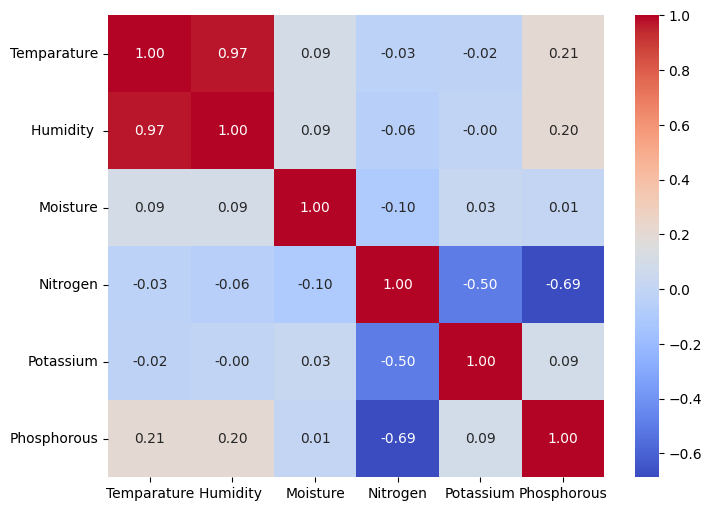

In [38]:
correlation_matrix = df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

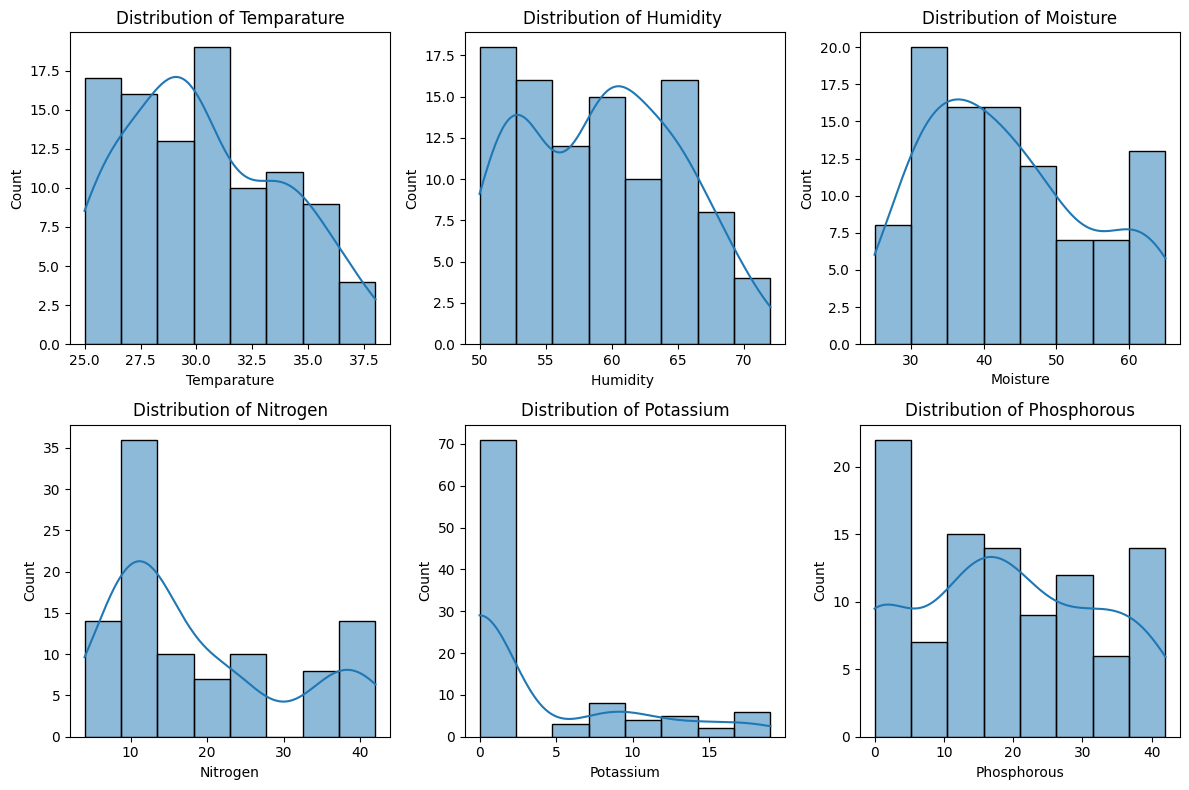

In [17]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

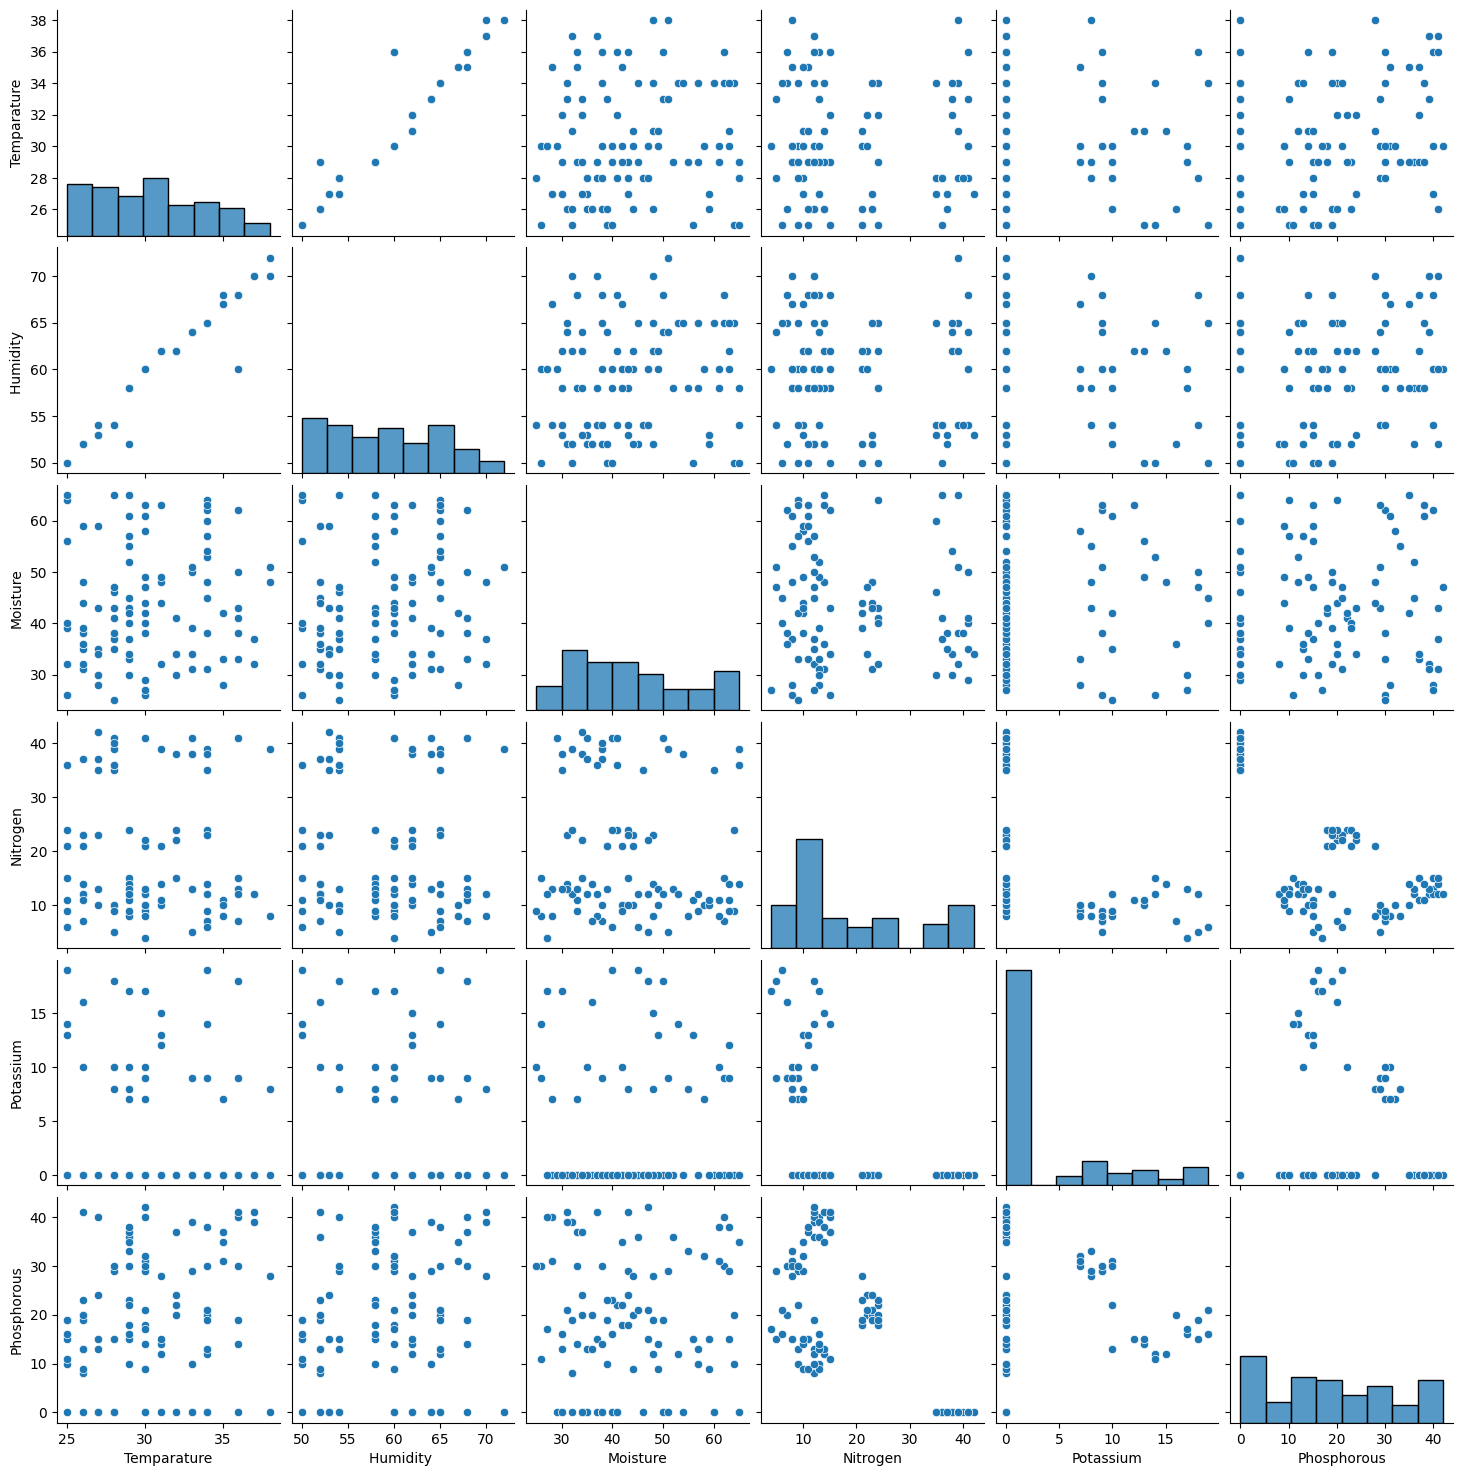

In [18]:
sns.pairplot(df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']])
plt.show()

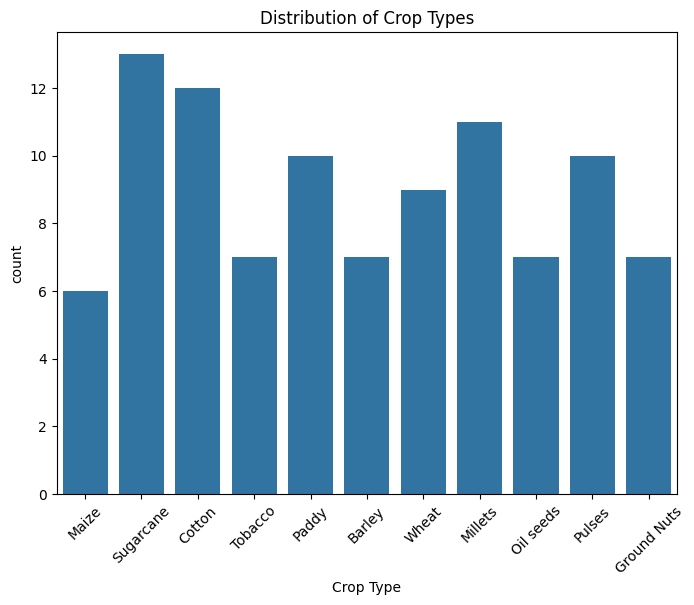

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Crop Type', data=df)
plt.title('Distribution of Crop Types')
plt.xticks(rotation=45)
plt.show()

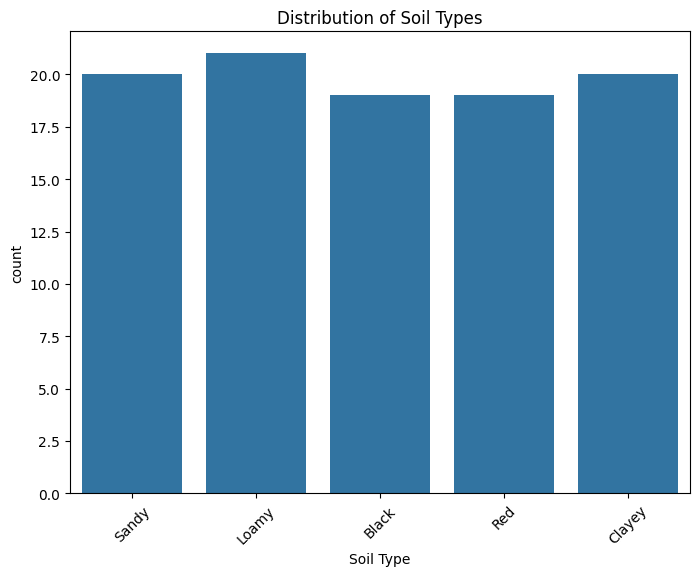

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Soil Type', data=df)
plt.title('Distribution of Soil Types')
plt.xticks(rotation=45)
plt.show()

In [40]:
label_encoder = LabelEncoder()

df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type'] = label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = label_encoder.fit_transform(df['Fertilizer Name'])

In [41]:
X = df[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']]
y = df['Crop Type']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [44]:
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.25      0.40         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1
           9       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.32      0.19      0.22        20
weighted avg       0.50      0.25      0.30        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

[[1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 2 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0]]
Accuracy: 0.25
